In [117]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from itertools import cycle
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth

## Round 1

In [118]:
centers = [[3, 3], [-2, -2], [1, -1]]
X, y = make_blobs(
    n_samples=25000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=0)

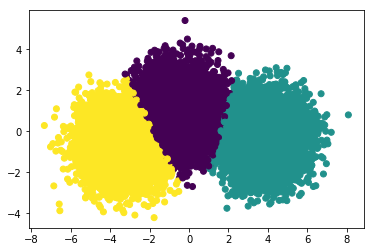

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        0  352   10
1      310    1    9
2        5    6  307
Centroids: 
 [[-2.00411909 -2.03226811]
 [ 2.02049682  1.99843453]
 [ 2.06696972 -1.85344308]]


In [120]:
X_pca = PCA(2).fit_transform(X) 
km = KMeans(n_clusters=3, random_state=0)
y_prd = km.fit_predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_prd)
plt.show()
predict=km.fit_predict(X_train)
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))
print('Centroids: \n', km.cluster_centers_)

Number of estimated clusters: 3


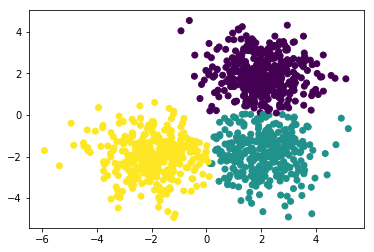

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    9  310
2        6  304    8
Centroids: 
 [[ 2.05336363  1.94684704]
 [ 2.03351038 -1.80755172]
 [-1.82315657 -2.02740552]]


In [104]:
# Mean-shift

bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=1000)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters: {}".format(n_clusters_))
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()
predict=ms.fit_predict(X_train)
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))
print('Centroids: \n', ms.cluster_centers_)

$$\text{Data Clustering Criteria} \\
\text{1: Compactness (think spots)} \\
\text{2: Connectivity (think doughnut)} $$

\begin{align} \text{rbf} = W_{ij}=e^\frac{\left\Vert x_i - x_j \right\Vert^2}{2\sigma^2} \end{align}

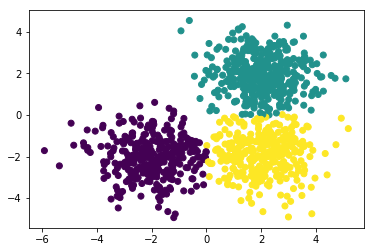

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        0  357    5
1      310    1    9
2        5    7  306


In [105]:
# Spectral Clustering
n_clusters=3
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)
predict=sc.fit_predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

\begin{align} \mathrm{Affinity\,Propagation} \end{align}

$$\sum_{l=1}^{n}\sum_{m=1}^{n}c_{lm}s(l,m)$$


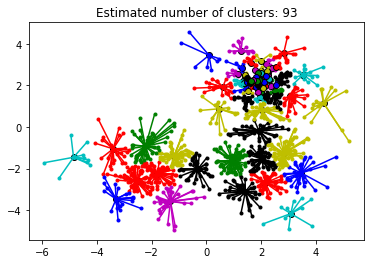

In [106]:
# Affinity Propagation
af = AffinityPropagation().fit(X_train)
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

plt.figure(1)
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],cluster_center[1],
             'o',markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

## Round 2

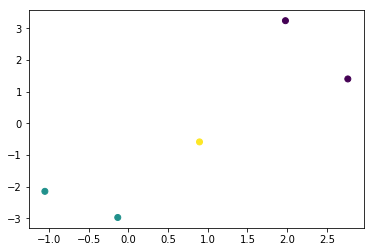

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352    0   10
1        1  310    9
2        6    5  307
Centroids: 
 [[ 2.02049682  1.99843453]
 [-2.00411909 -2.03226811]
 [ 2.06696972 -1.85344308]]


In [140]:
centers = [[1, 1], [-2, -2], [1, -1]]
X, y = make_blobs(
    n_samples=5,
    centers=centers,
    cluster_std=1,
    n_features=20,
    random_state=0)
# X_pca = PCA(2).fit_transform(X) 
km = KMeans(n_clusters=3, random_state=42)
y_prd = km.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_prd)
plt.show()
predict=km.fit_predict(X_train)
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, predict))
print('Centroids: \n', km.cluster_centers_)

Number of estimated clusters: 3


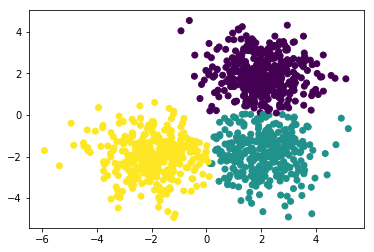

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    9  310
2        6  304    8


In [109]:
# Mean-shift
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=1000)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

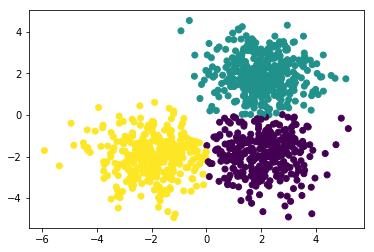

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        5  357    0
1        9    1  310
2      306    7    5


In [110]:
# Spectral Clustering
n_clusters=3
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)
predict=sc.fit_predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

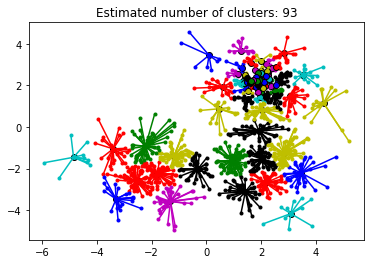

In [111]:
# Affinity Propagation
af = AffinityPropagation().fit(X_train)
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

plt.figure(1)
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],cluster_center[1],
             'o',markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

## Round 3

In [112]:
centers = [[2, 3], [-2, -2], [3, -1]]
X, y = make_blobs(
    n_samples=20000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=0)

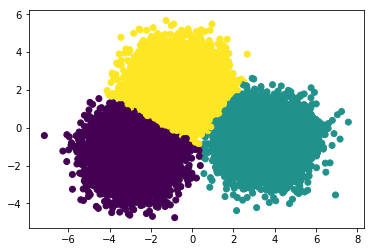

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        0  352   10
1      310    1    9
2        5    6  307
Centroids: 
 [[-2.00411909 -2.03226811]
 [ 2.02049682  1.99843453]
 [ 2.06696972 -1.85344308]]


In [113]:
X_pca = PCA(2).fit_transform(X) 
km = KMeans(n_clusters=3, random_state=0)
y_prd = km.fit_predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_prd)
plt.show()
predict=km.fit_predict(X_train)
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))
print('Centroids: \n', km.cluster_centers_)

Number of estimated clusters: 3


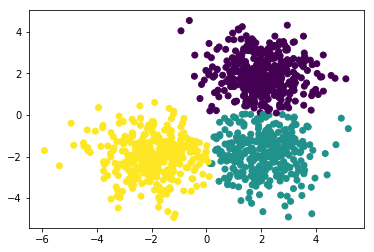

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    9  310
2        6  304    8


In [114]:
# Mean-shift
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=1000)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

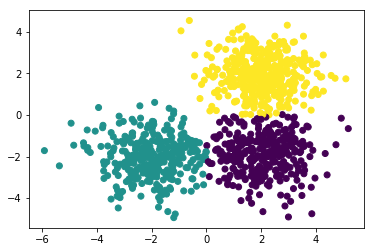

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        5    0  357
1        9  310    1
2      306    5    7


In [115]:
# Spectral Clustering
n_clusters=3
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)
predict=sc.fit_predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

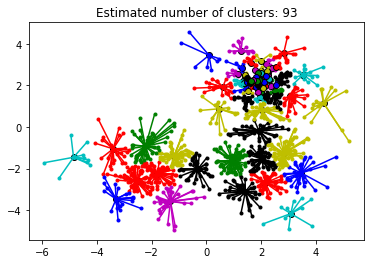

In [116]:
# Affinity Propagation
af = AffinityPropagation().fit(X_train)
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

plt.figure(1)
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],cluster_center[1],
             'o',markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

### Estimated clusters in affinity propogations were all 93 clusters. As far as I can tell all of the data looks the exact same. The results at least. All of the centroid locations changed, and the graphs look different. As far as I can tell all of the methods were about the same; which probably means that I did something wrong.      